In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



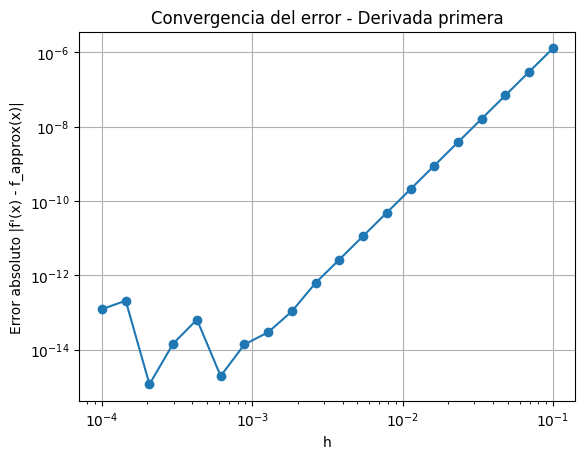

f''(π/8) aproximada con h=0.05: -0.9238794683673055
f''(π/8) exacta: -0.9238795325112867
Error absoluto: 6.414398e-08
h = 0.1    | f'' ≈ -0.923879 | Error: 1.03e-06
h = 0.05   | f'' ≈ -0.923879 | Error: 6.41e-08
h = 0.01   | f'' ≈ -0.923880 | Error: 1.02e-10
h = 0.005  | f'' ≈ -0.923880 | Error: 6.08e-14


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función a derivar
f = lambda x: np.cos(x)
f_deriv_exacta = lambda x: -np.sin(x)
f_segunda_exacta = lambda x: -np.cos(x)

# Derivada primera con el método de cinco puntos
def five_point_derivative(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

# Derivada segunda con el método de cinco puntos
def five_point_second_derivative(f, x, h):
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)

# Parte 1: valores de x
x_vals = np.linspace(0, 2*np.pi, 10)
y_vals = f(x_vals)

# Derivada en x = π/8 con diferentes h
x0 = np.pi / 8
h_vals = np.logspace(-1, -4, 20)
errores_primera = []

for h in h_vals:
    aprox = five_point_derivative(f, x0, h)
    error = abs(aprox - f_deriv_exacta(x0))
    errores_primera.append(error)

# Gráfico de convergencia de error
plt.figure()
plt.loglog(h_vals, errores_primera, marker='o')
plt.xlabel('h')
plt.ylabel('Error absoluto |f\'(x) - f_approx(x)|')
plt.title('Convergencia del error - Derivada primera')
plt.grid(True)
plt.show()

# Parte 2: derivada segunda en x = π/8 con h = 0.05
h2 = 0.05
fpp_aprox = five_point_second_derivative(f, x0, h2)
fpp_real = f_segunda_exacta(x0)
error_segunda = abs(fpp_aprox - fpp_real)

print(f"f''(π/8) aproximada con h=0.05: {fpp_aprox}")
print(f"f''(π/8) exacta: {fpp_real}")
print(f"Error absoluto: {error_segunda:.6e}")

# Evaluar si mejora con h menor
for h in [0.1, 0.05, 0.01, 0.005]:
    fpp_h = five_point_second_derivative(f, x0, h)
    err = abs(fpp_h - fpp_real)
    print(f"h = {h:<6} | f'' ≈ {fpp_h:.6f} | Error: {err:.2e}")

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

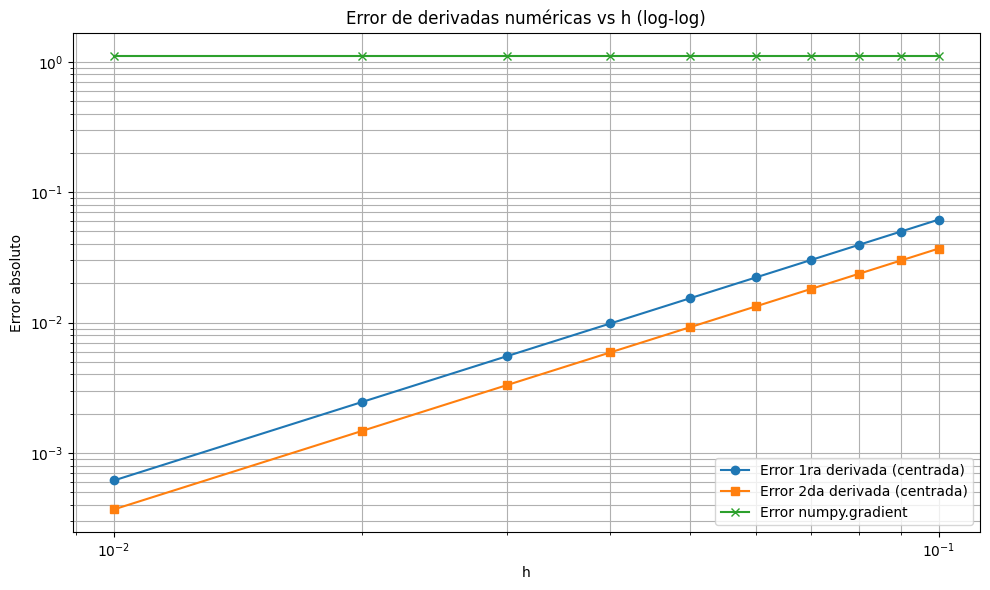

Valor óptimo de h para primera derivada centrada: 0.01000


In [5]:
# Función y derivadas exactas
f = lambda x: x * np.exp(x)
f_prime_exact = lambda x: np.exp(x)*(x + 1)
f_double_prime_exact = lambda x: np.exp(x)*(x + 2)

# Punto de evaluación
x0 = 2.0

# Rango de h
h_vals = np.linspace(0.01, 0.1, 10)

# Almacenar errores
errores_primera = []
errores_segunda = []
errores_gradient = []

# Evaluación
for h in h_vals:
    # Derivada centrada
    f_prime = (f(x0 + h) - f(x0 - h)) / (2 * h)
    f_double_prime = (f(x0 + h) - 2*f(x0) + f(x0 - h)) / (h**2)

    # Derivadas exactas
    f1_exact = f_prime_exact(x0)
    f2_exact = f_double_prime_exact(x0)

    # Error absoluto
    errores_primera.append(abs(f_prime - f1_exact))
    errores_segunda.append(abs(f_double_prime - f2_exact))

    # numpy.gradient with 6 points between 1.8 and 2.2
    x_arr = np.linspace(1.8, 2.2, 6)
    y_arr = f(x_arr)
    grad = np.gradient(y_arr, x_arr)
    # Interpolate derivative at x=2.0 (index 2 or 3)
    idx = np.argmin(np.abs(x_arr - x0))
    errores_gradient.append(abs(grad[idx] - f1_exact))

# === Graficar errores ===
plt.figure(figsize=(10, 6))
plt.loglog(h_vals, errores_primera, 'o-', label='Error 1ra derivada (centrada)')
plt.loglog(h_vals, errores_segunda, 's-', label='Error 2da derivada (centrada)')
plt.loglog(h_vals, errores_gradient, 'x-', label='Error numpy.gradient')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Error de derivadas numéricas vs h (log-log)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

# Find optimal value of h (minimum error for first central difference)
h_opt = h_vals[np.argmin(errores_primera)]
print(f"Valor óptimo de h para primera derivada centrada: {h_opt:.5f}")